## Salman Rashid K V - DSML December Batch

## Business Case: Delhivery - Feature Engineering

### About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


### Business Problem

The company wants to understand and process the data coming out of data engineering pipelines. Clean, sanitize and manipulate data to get useful features out of raw fields. Make sense out of the raw data and help the data science team to build forecasting models on it.

### Problem Statement
- Study the data set for data cleaning and preprocessing
- Detect outliers in the data set using describe function and boxplot
- Understand the distribution of data for the quantitative attributes
- Understand correlations of data among the quantitative attributes
- Univariate, bivariate & multivariate analysis to check relationship between different features
- Dealing with missing and data cleaning & In depth analysis with feature engineering
- Peform the Hypothesis testing for different features for business recommendations
    - Hypothesis testing for time_difference and start_scan_to_end_scan
    - Actual_time aggregated value and OSRM time aggregated value
    - Actual_time aggregated value and segment actual time aggregated value
    - Osrm distance aggregated value and segment osrm distance aggregated value
    - Osrm time aggregated value and segment osrm time aggregated value
- Categorical to Numerical encoding : Performing One-hot encoding & Target encoding
- Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

### Data Information

**Data set**
- data - whether the data is testing or training data
- trip_creation_time – timestamp of trip creation
- route_schedule_uuid – unique Id for a particular route schedule
- route_type – Transportation type<br>
  FTL – Full Truck Load: FTL shipments get to the destination sooner, as the
truck is making no other pickups or drop-offs along the way.<br>Carting: handling system consisting of small vehicles (carts)
- trip_uuid - unique ID given to a particular trip (A trip may include different source
and destination centers)
- source_center - source ID of trip origin
- source_name - source Name of trip origin
- destination_cente – destination ID
- destination_name – destination Name
- od_start_time – trip start time
- od_end_time – trip end time
- start_scan_to_end_scan – time taken to deliver from source to destination
- actual_distance_to_destination – distance in Kms between source and
destination warehouse
- actual_time – actual time taken to complete the delivery (cumulative)
- osrm_time – an open-source routing engine time calculator which computes the
shortest path between points in a given map<br>(includes usual traffic, distance
through major and minor roads) and gives the time (cumulative)
- osrm_distance – an open-source routing engine which computes the shortest
path between points in a given map<br>(includes usual traffic, distance through
major and minor roads) (cumulative)
- segment_actual_time – this is a segment time. Time taken by the subset of the
package delivery
- segment_osrm_time – this is the OSRM segment time. Time taken by the subset
of the package delivery
- segment_osrm_distance – this is the OSRM distance. Distance covered by subset
of the package delivery

## Basic Data Exploration

### **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, probplot
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

### **Reading the dataset**

In [323]:
df=pd.read_csv('delhivery_data.csv')
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


### **Shape of the dataset**

In [3]:
df.shape

(144867, 24)

- Number of rows = 144867
- Number of columns = 24

### **Attributes of the dataset**

In [4]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

### **Data types of the attributes**

In [324]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

### **Converting required object data types to date time**

In [325]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])

### **Overall information of the dataset**

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

### **Checking for duplicate values**

In [327]:
df.duplicated().value_counts()

False    144867
dtype: int64

There are no duplicate values in the dataset

### **Checking for null values**

In [8]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

There are a few number of null values in two columns of the dataset which are 'source_name' and 'destination_name'                  

### **The statistical summary of numerical values in the dataset**

In [9]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


The mean and median for most of the columns in the dataset shows large variation. There is chance for occurence of outliers in those columns

### **The statistical summary of non-numerical values in the dataset**

In [328]:
df.describe(include='object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144574,144867,144606
unique,2,1504,2,14817,1508,1498,1481,1468
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


### **Categorical Columns**

In [11]:
cat_cols = df.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name']

### **Numerical Columns**

In [12]:
num_cols = df.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['trip_creation_time',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'cutoff_timestamp',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

### **No. Of Unique Values in each columns**

In [13]:
for i in df.columns:
    print(i,':',df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


### Value count of each columns

In [406]:
for i in df.columns:
    print(i,':',df[i].value_counts())

data : training    104858
test         40009
Name: data, dtype: int64
trip_creation_time : 2018-09-28 05:23:15.359220    101
2018-10-02 06:05:53.086094    101
2018-09-27 04:47:19.425867    101
2018-09-22 04:55:04.835022    101
2018-09-29 05:04:57.639067    101
                             ... 
2018-09-27 18:08:18.207639      1
2018-09-28 17:31:07.690205      1
2018-09-29 14:56:33.655170      1
2018-09-19 04:35:44.776558      1
2018-09-14 17:04:32.989471      1
Name: trip_creation_time, Length: 14817, dtype: int64
route_schedule_uuid : thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:d563d17e-2123-40a4-9eec-40018966caba       1
thanos::sroute:036f372d-28d8-4d19-877c-

## Merging The Rows

### Merging some rows based on the columns trip_uuid, source ID and destination ID

In [375]:
merged_df=df.groupby(['trip_uuid','source_center','destination_center']).agg({'data':'first',
                                                                              'trip_creation_time':'first',
                                                                              'route_schedule_uuid':'first',
                                                                              'route_type':'first',
                                                                              'source_name':'first',
                                                                              'destination_name':'last',
                                                                              'od_start_time':'first',
                                                                              'od_end_time':'first',
                                                                              'start_scan_to_end_scan':'max',
                                                                              'actual_distance_to_destination':'max',
                                                                              'actual_time':'max',
                                                                              'osrm_time':'max',
                                                                              'osrm_distance':'max',
                                                                              'segment_actual_time':'sum',
                                                                              'segment_osrm_time':'sum',
                                                                              'segment_osrm_distance':'sum'}).reset_index()
merged_df

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,242.309306,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


- Performed row merging based on the columns trip_uuid, source_center and destination_center
- Corresponding aggregated values are shown in the respective columns (start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance)
- No of rows has reduced to 26,368 from 1,44,867 after merging of the rows based on trip_uuid, source_center and destination_center

### Further row merging the above dataframe based on the trip_uuid column

In [376]:
merged_df1=merged_df.groupby('trip_uuid').agg({'source_center':'first',
                                               'destination_center':'last',
                                               'data':'first',
                                               'trip_creation_time':'first',
                                               'route_schedule_uuid':'first',
                                               'route_type':'first',
                                               'source_name':'first',
                                               'destination_name':'last',
                                               'od_start_time':'first',
                                               'od_end_time':'first',
                                               'start_scan_to_end_scan':'sum',
                                               'actual_distance_to_destination':'sum',
                                               'actual_time':'sum',
                                               'osrm_time':'sum',
                                               'osrm_distance':'sum',
                                               'segment_actual_time':'sum',
                                               'segment_osrm_time':'sum',
                                               'segment_osrm_distance':'sum'}).reset_index()
merged_df1

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,743.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,3933.0,1932.273969,3347.0,1741.0,2372.0852,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,2018-10-04 02:28:43.529141,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,2018-10-04 06:59:51.621332,421.0,38.684839,282.0,54.0,63.2841,281.0,88.0,104.8866
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,2018-10-04 01:44:53.808000,347.0,134.723836,264.0,184.0,177.6635,258.0,221.0,223.5324


- Further row merging based on the column trip_uuid is performed
- Sum of each aggregated columns are further obtained for respective columns (start_scan_to_end_scan, actual_distance_to_destination, actual_time, osrm_time, osrm_distance, segment_actual_time, segment_osrm_time, segment_osrm_distance)
- No of rows has further reduced from 26,368 to 14,817 after merging of the rows based on trip_uuid

In [378]:
merged_df1['trip_creation_time'] = pd.to_datetime(merged_df1['trip_creation_time'])

### Split and extract features out of  the column 'destination_name'

In [379]:
dr=merged_df1.copy()
x=dr['destination_name'].str.split("(", expand = True)
x[1]=x[1].str.rstrip(')')
y=x[0].str.split("_", expand = True)
print(x)
y

                            0              1
0         Kanpur_Central_H_6   Uttar Pradesh
1      Doddablpur_ChikaDPP_D       Karnataka
2        Gurgaon_Bilaspur_HB         Haryana
3           Mumbai_MiraRd_IP     Maharashtra
4          Sandur_WrdN1DPP_D       Karnataka
...                       ...            ...
14812  Chandigarh_Mehmdpur_H          Punjab
14813   Faridabad_Blbgarh_DC         Haryana
14814     Kanpur_GovndNgr_DC   Uttar Pradesh
14815  Tirchchndr_Shnmgprm_D      Tamil Nadu
14816      Sandur_WrdN1DPP_D       Karnataka

[14817 rows x 2 columns]


,0,1,2,3
0,Kanpur,Central,H,6
1,Doddablpur,ChikaDPP,D,None
2,Gurgaon,Bilaspur,HB,None
3,Mumbai,MiraRd,IP,None
4,Sandur,WrdN1DPP,D,None
...,...,...,...,...
14812,Chandigarh,Mehmdpur,H,None
14813,Faridabad,Blbgarh,DC,None
14814,Kanpur,GovndNgr,DC,None
14815,Tirchchndr,Shnmgprm,D,None


In [380]:
merged_df1['dest_city']  = y[0]
merged_df1['dest_place'] = y[1]
merged_df1['dest_state'] = x[1]

- Features like city, place and state are extracted from the 'destination_name' by splitting the column into 3 component columns 

### Split and extract features out of  the column 'source_name'

In [381]:
x=dr['source_name'].str.split("(", expand = True)
x[1]=x[1].str.rstrip(')')
y=x[0].str.split("_", expand = True)
print(x)
y

                             0              1
0          Kanpur_Central_H_6   Uttar Pradesh
1       Doddablpur_ChikaDPP_D       Karnataka
2         Gurgaon_Bilaspur_HB         Haryana
3                  Mumbai Hub     Maharashtra
4                  Bellary_Dc       Karnataka
...                        ...            ...
14812   Chandigarh_Mehmdpur_H          Punjab
14813      FBD_Balabhgarh_DPC         Haryana
14814      Kanpur_GovndNgr_DC   Uttar Pradesh
14815  Tirunelveli_VdkkuSrt_I      Tamil Nadu
14816       Sandur_WrdN1DPP_D       Karnataka

[14817 rows x 2 columns]


,0,1,2,3
0,Kanpur,Central,H,6
1,Doddablpur,ChikaDPP,D,None
2,Gurgaon,Bilaspur,HB,None
3,Mumbai Hub,None,None,None
4,Bellary,Dc,None,None
...,...,...,...,...
14812,Chandigarh,Mehmdpur,H,None
14813,FBD,Balabhgarh,DPC,None
14814,Kanpur,GovndNgr,DC,None
14815,Tirunelveli,VdkkuSrt,I,None


In [382]:
merged_df1['source_city']  = y[0]
merged_df1['source_place'] = y[1]
merged_df1['source_state'] = x[1]

- Features like city, place and state are extracted from the 'source_name' by splitting the column into 3 component columns 

### Extract features like month, year and day from the column 'trip_creation_time'

In [404]:
merged_df1['total_min_diff']=(merged_df1.od_end_time - merged_df1.od_start_time) / pd.Timedelta(minutes=1)

merged_df1['trip_creation_year'] = merged_df1['trip_creation_time'].dt.year
merged_df1['trip_creation_month'] = merged_df1['trip_creation_time'].dt.month
merged_df1['trip_creation_day'] = merged_df1['trip_creation_time'].dt.day

merged_df1.drop(columns=['source_name','destination_name'],axis=1, inplace=True)
merged_df1.drop(columns=['od_end_time','od_start_time'],axis=1, inplace=True)
merged_df1

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,dest_state,source_city,source_place,source_state,total_min_diff,trip_creation_year,trip_creation_month,trip_creation_day,weekday,month
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2259.0,824.732854,1562.0,...,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,1260.604421,2018,9,12,Wednesday,September
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,180.0,73.186911,143.0,...,Karnataka,Doddablpur,ChikaDPP,Karnataka,58.832388,2018,9,12,Wednesday,September
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,3933.0,1932.273969,3347.0,...,Haryana,Gurgaon,Bilaspur,Haryana,834.638929,2018,9,12,Wednesday,September
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,100.0,17.175274,59.0,...,Maharashtra,Mumbai Hub,None,Maharashtra,100.494935,2018,9,12,Wednesday,September
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,717.0,127.448500,341.0,...,Karnataka,Bellary,Dc,Karnataka,152.012914,2018,9,12,Wednesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,257.0,57.762332,83.0,...,Punjab,Chandigarh,Mehmdpur,Punjab,152.787843,2018,10,3,Wednesday,October
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,60.0,15.513784,21.0,...,Haryana,FBD,Balabhgarh,Haryana,60.590521,2018,10,3,Wednesday,October
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,421.0,38.684839,282.0,...,Uttar Pradesh,Kanpur,GovndNgr,Uttar Pradesh,248.409092,2018,10,3,Wednesday,October
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,347.0,134.723836,264.0,...,Tamil Nadu,Tirunelveli,VdkkuSrt,Tamil Nadu,105.656951,2018,10,3,Wednesday,October


- Features like day, month and year are extracted from the 'trip_creation_year' by splitting the column into 3 component columns 
- Dropped unwanted columns like source_name, destination_name, od_end_time and od_start_time from the dataframe

### Distribution of the quantitive data

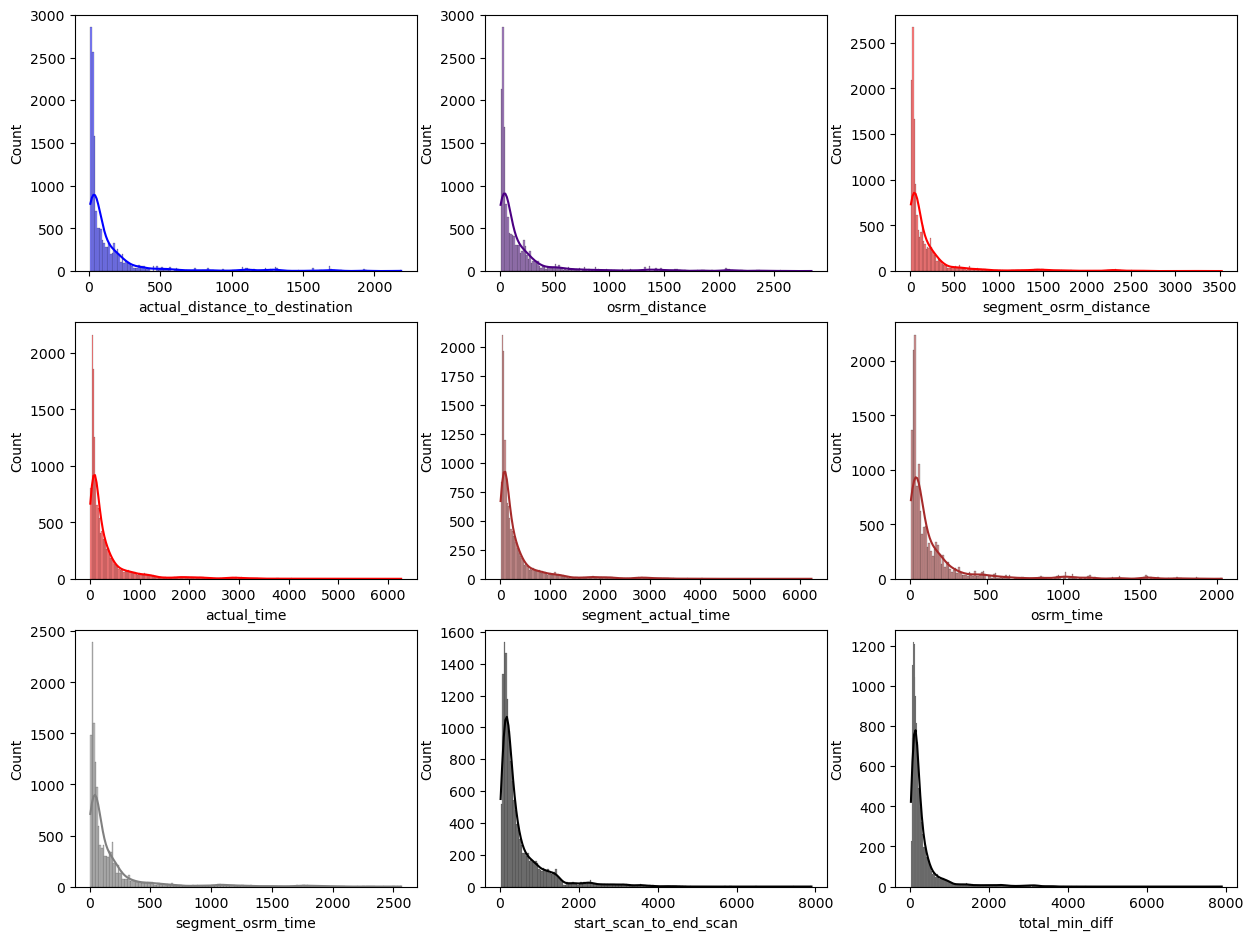

In [386]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=merged_df1, x="actual_distance_to_destination", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=merged_df1, x="osrm_distance", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=merged_df1, x="segment_osrm_distance", kde=True,color="red", ax=axis[0,2])
sns.histplot(data=merged_df1, x="actual_time", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=merged_df1, x="segment_actual_time", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=merged_df1, x="osrm_time", kde=True,color="brown", ax=axis[1,2])
sns.histplot(data=merged_df1, x="segment_osrm_time", kde=True,color="grey", ax=axis[2,0])
sns.histplot(data=merged_df1, x="start_scan_to_end_scan", kde=True,color="black", ax=axis[2,1])
sns.histplot(data=merged_df1, x="total_min_diff", kde=True,color="black", ax=axis[2,2])
plt.show()

From the above observations we can say that : 
-  All plots in the above distribution resembles log normal distribution curve
-  Most of the values in actual_distance_to_destination lies in range of 0 - 500
-  Most of the values in osrm_distance lies in range of 0 - 700
-  Most of the values in segment_osrm_distance_sum lies in range of 0 - 600
-  Most of the values in actual_time lies in range of 0 - 1000
-  Most of the values in segment_actual_time_sum lies in range of 0 - 1100
-  Most of the values in osrm_time lies in range of 0 - 400
-  Most of the values in segment_osrm_time_sum lies in range of 0 - 500
-  Most of the values in start_scan_to_end_scan lies in range of 0 - 1900
-  Most of the values in od_time_diff_hour lies in range of 0 - 1900

### Correlation of the quantitative data

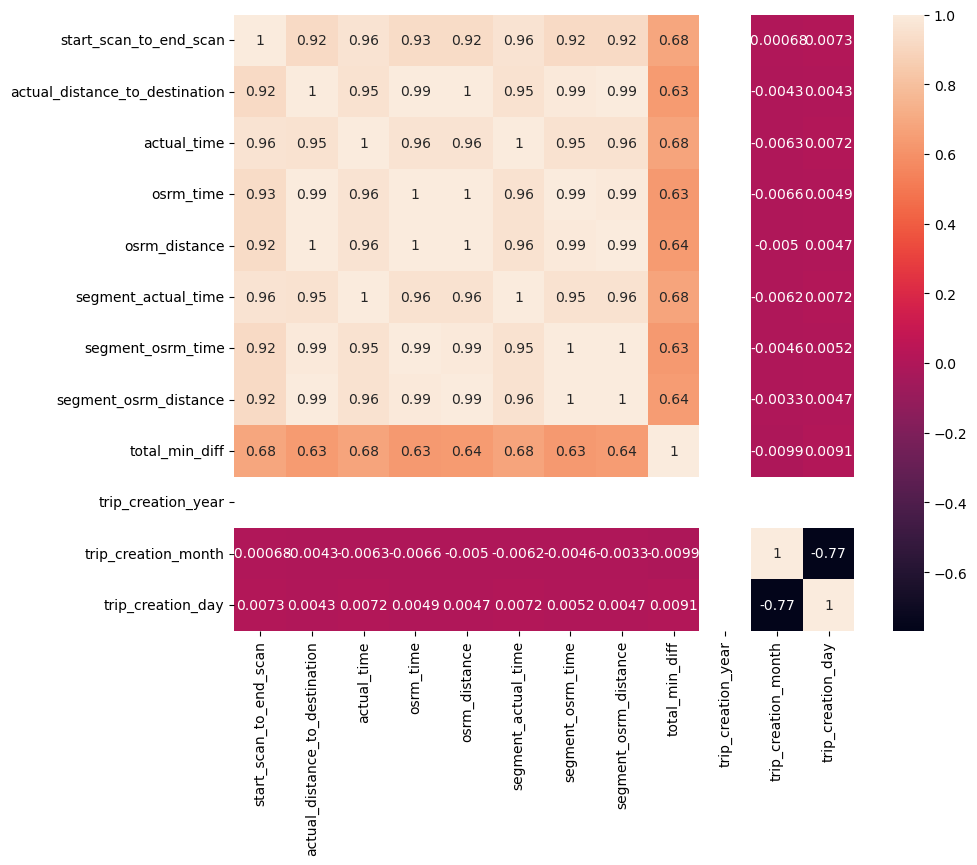

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(merged_df1.corr(), annot=True)
plt.show()

## Data Visualization

### Route type preferred for the product delivery

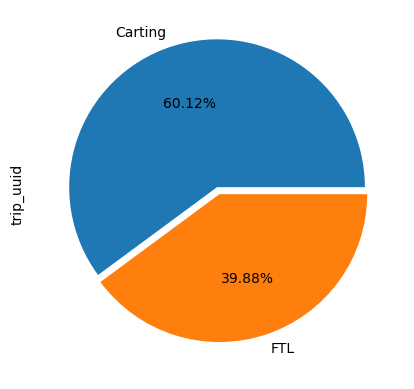

In [387]:
r_type = merged_df1.groupby('route_type')['trip_uuid'].count().plot(kind='pie', explode=(0.05,0), autopct='%0.2f%%')


- Most of the products are delivered using carting method
- Around 63 % of the products are delivered via carting while around 38 % followed delivery through FTL

### Average time taken by different route types to deliver products

In [388]:
merged_df1.groupby('route_type')['start_scan_to_end_scan'].mean().reset_index()

,route_type,start_scan_to_end_scan
0,Carting,246.537382
1,FTL,959.359790


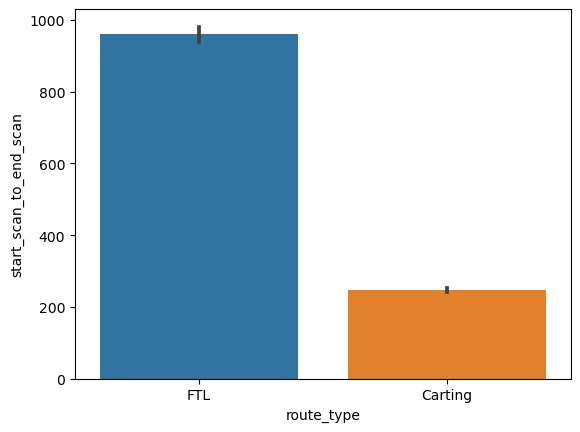

In [389]:
sns.barplot(data=merged_df1, x='route_type', y='start_scan_to_end_scan')
plt.show()

- Average time took for a product to reach the end point is significantly higher for FTL compared to that of carting
- There is high chance that people prefer carting over FTL, because it takes lesser average time to deliver products

### Relation between actual time and estimated time for route types

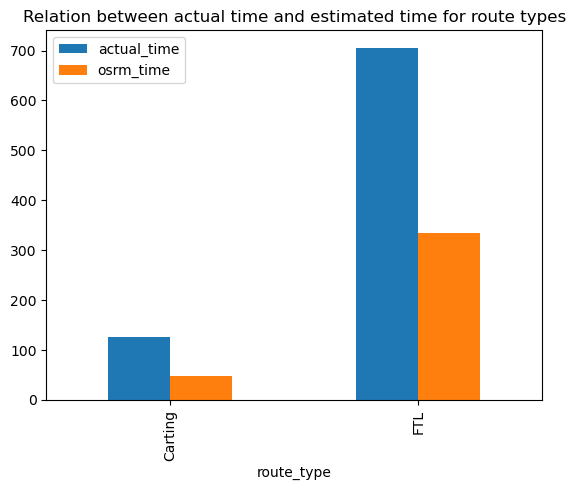

In [390]:
merged_df1.groupby('route_type').aggregate({'actual_time':'mean','osrm_time':'mean'}).plot(kind='bar')
plt.title('Relation between actual time and estimated time for route types')
plt.show()

- Full truck load route type takes more time to deliver products as its actual and estimated time is significantly higher than that of the carting route type
- Actual time is higher for both carting and FTL route types compared to estimated time

### Relation between actual distance and estimated distance for route types

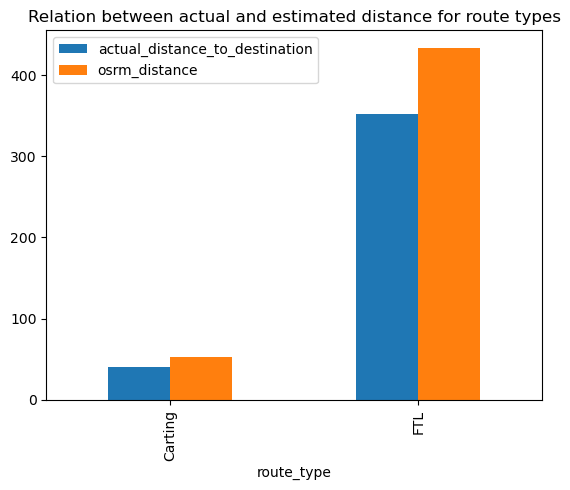

In [391]:
merged_df1.groupby('route_type').aggregate({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).plot(kind='bar')
plt.title('Relation between actual and estimated distance for route types')
plt.show()

- Estimated distance is higher for both carting and FTL route types compared to actual distance
- Full truck load route type travels more distance to deliver products than that of the carting route type

### Top Indian states with most source and destination centres

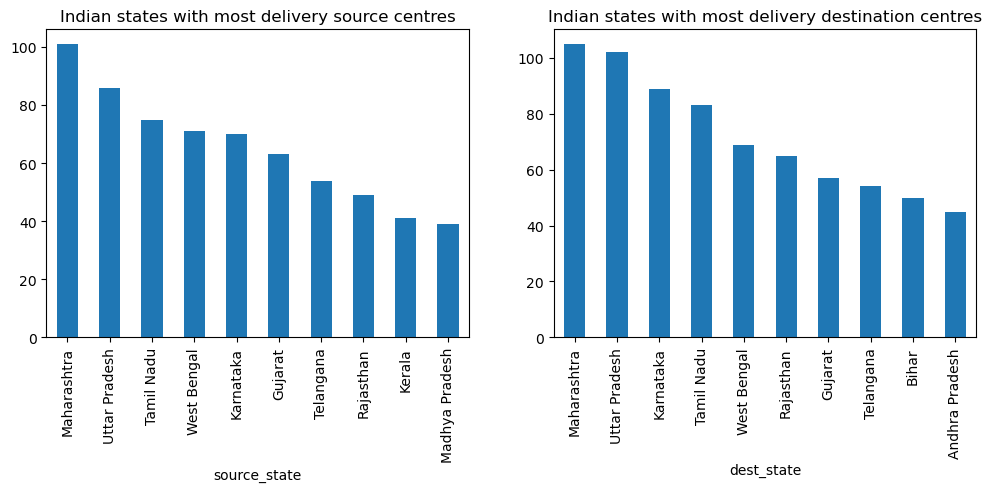

In [392]:
plt.figure(figsize=(12,4))
plt.subplot(121)
top_state = merged_df1.groupby('source_state')['source_center'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery source centres')

plt.subplot(122)
merged_df1.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery destination centres')
plt.show()

Top 5 Indian states with most delivery source centres are :
   - Maharashtra
   - Uttar Pradesh
   - Tamil Nadu
   - West Bengal and
   - Karnataka
   
<br>Top 5 Indian states with most delivery destination centres are :

- Maharashtra
- Uttar Pradesh
- Haryana
- Karnataka and
- Tamil Nadu

### Top Indian states with most source and destination cities

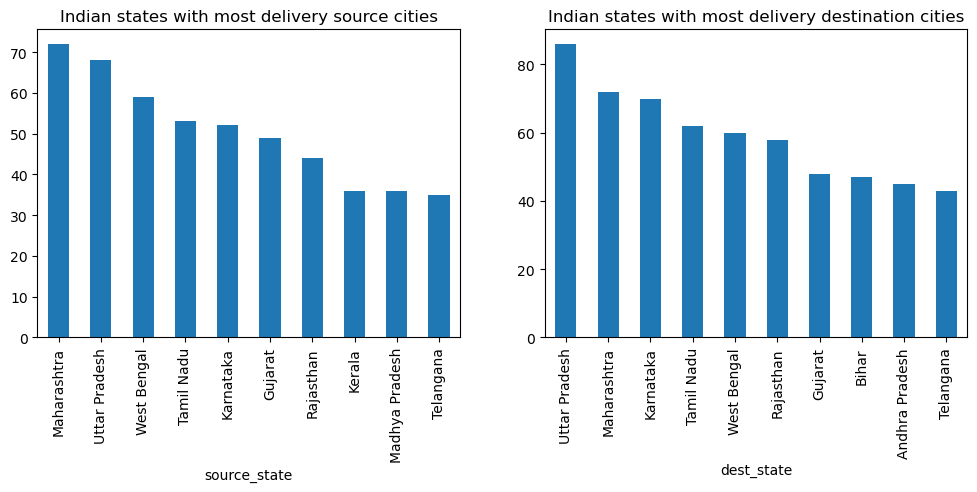

In [394]:
plt.figure(figsize=(12,4))
plt.subplot(121)
merged_df1.groupby('source_state')['source_city'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery source cities')

plt.subplot(122)
merged_df1.groupby('dest_state')['dest_city'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Indian states with most delivery destination cities')
plt.show()

Top 5 Indian states with most delivery source cities are :
   - Maharashtra
   - Uttar Pradesh
   - West Bengal 
   - Tamil Nadu and
   - Karnataka

<br>Top 5 Indian states with most delivery destination cities are :

- Maharashtra
- Uttar Pradesh
- West Bengal
- Tamil Nadu and
- Karnataka    
   

### Weekday & Month with most delivery of the products

In [395]:
merged_df1['weekday'] = merged_df2['trip_creation_time'].dt.day_name()
merged_df1['month'] = merged_df2['trip_creation_time'].dt.month_name()
merged_df1

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,...,dest_state,source_city,source_place,source_state,total_min_diff,trip_creation_year,trip_creation_month,trip_creation_day,weekday,month
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,...,Uttar Pradesh,Kanpur,Central,Uttar Pradesh,1260.604421,2018,9,12,Wednesday,September
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,...,Karnataka,Doddablpur,ChikaDPP,Karnataka,58.832388,2018,9,12,Wednesday,September
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,...,Haryana,Gurgaon,Bilaspur,Haryana,834.638929,2018,9,12,Wednesday,September
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,...,Maharashtra,Mumbai Hub,None,Maharashtra,100.494935,2018,9,12,Wednesday,September
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,...,Karnataka,Bellary,Dc,Karnataka,152.012914,2018,9,12,Wednesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56.258533,...,Punjab,Chandigarh,Mehmdpur,Punjab,152.787843,2018,10,3,Wednesday,October
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23.863155,...,Haryana,FBD,Balabhgarh,Haryana,60.590521,2018,10,3,Wednesday,October
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-04 02:51:27.075797,...,Uttar Pradesh,Kanpur,GovndNgr,Uttar Pradesh,248.409092,2018,10,3,Wednesday,October
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-03 23:59:14.390954,...,Tamil Nadu,Tirunelveli,VdkkuSrt,Tamil Nadu,105.656951,2018,10,3,Wednesday,October


In [396]:
x=merged_df1['weekday'].value_counts().to_frame('count').reset_index()
x

,index,count
0,Wednesday,2739
1,Saturday,2130
2,Thursday,2106
3,Friday,2060
4,Tuesday,2040
5,Monday,1987
6,Sunday,1755


In [398]:
y=merged_df1['month'].value_counts().to_frame('count').reset_index()
y

,index,count
0,September,13029
1,October,1788


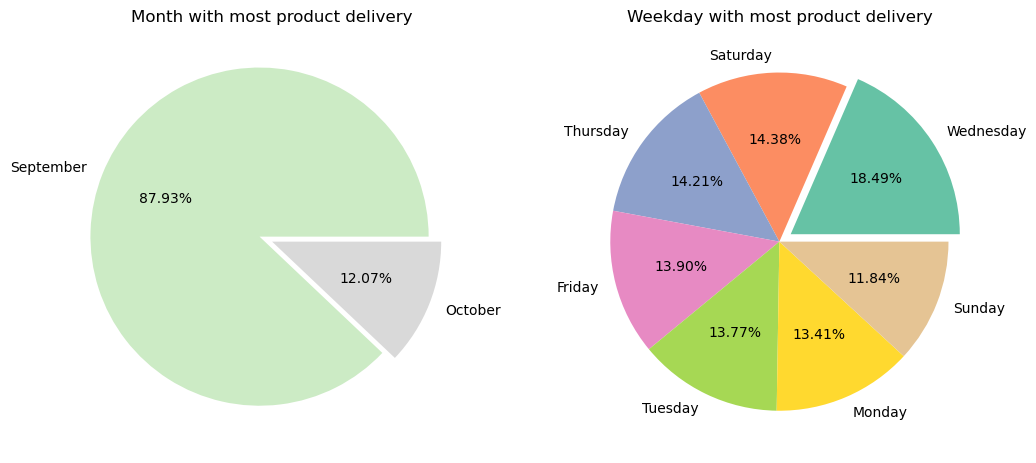

In [399]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

palette_color = sns.color_palette('Set3_r')
axs[0].pie(data=y, x=y['count'], colors=palette_color, labels=['September', 'October'], explode=(0.08,0), autopct='%0.2f%%')
axs[0].set_title("Month with most product delivery")

palette_color = sns.color_palette('Set2')
axs[1].pie(data=x, x=x['count'], colors=palette_color, labels=['Wednesday','Saturday', 'Thursday', 'Friday','Tuesday', 'Monday','Sunday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
axs[1].set_title("Weekday with most product delivery")
plt.show()

- The given data for product delivery is over the period of two months, september and october
- Majority of the product delivery is done across the month of september
- Most number of products are delivered on wednesday, followed by saturday and then thursday
- Least number of produscts are delivered on sunday

### Relation between actual time and estimated time for the completion of product delivery

In [400]:
x1=merged_df1.groupby('source_state').aggregate({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
x1

,source_state,variable,value
0,Andhra Pradesh,actual_time,398.170115
1,Arunachal Pradesh,actual_time,429.250000
2,Assam,actual_time,540.171642
3,Bihar,actual_time,491.985755
4,Chandigarh,actual_time,168.741935
5,Chhattisgarh,actual_time,174.139535
6,Dadra and Nagar Haveli,actual_time,48.333333
7,Delhi,actual_time,230.550824
8,Goa,actual_time,540.138462
9,Gujarat,actual_time,331.470667


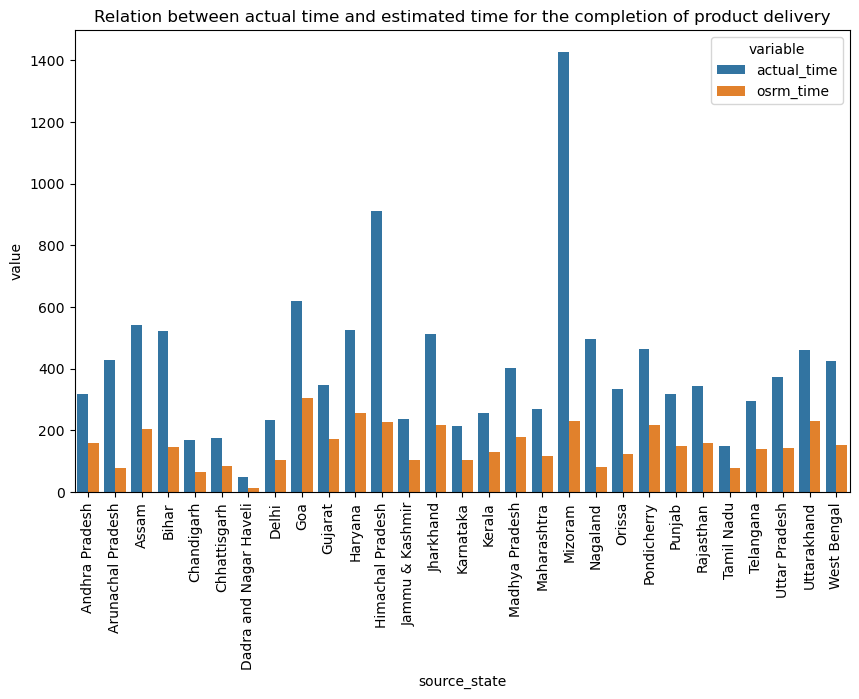

In [336]:
plt.figure(figsize=(10,6))
sns.barplot(data=x1,x='source_state',y='value',hue='variable')
plt.title('Relation between actual time and estimated time for the completion of product delivery')
plt.xticks(rotation=90)
plt.show()

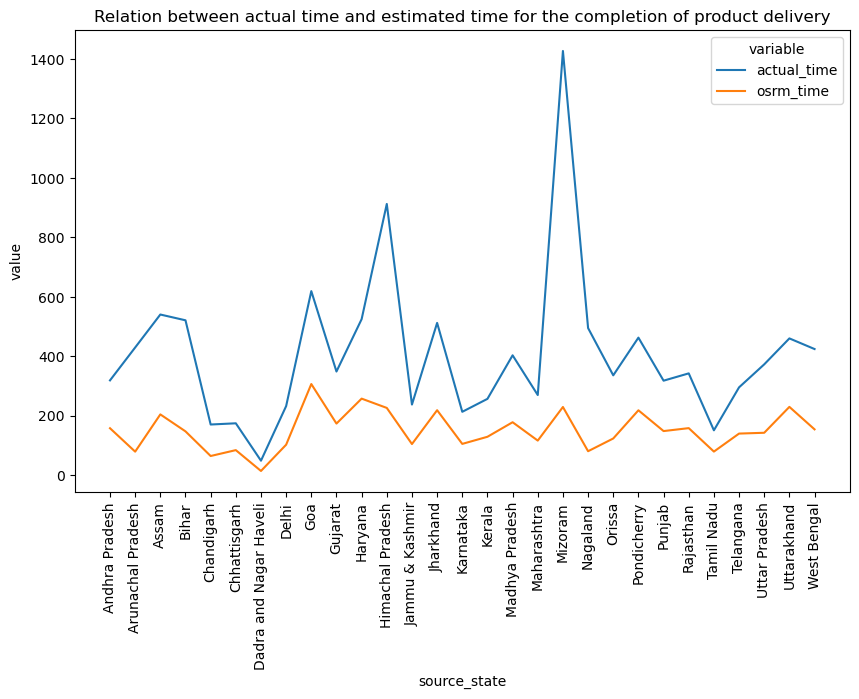

In [337]:
plt.figure(figsize=(10,6))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.title('Relation between actual time and estimated time for the completion of product delivery')
plt.xticks(rotation=90)
plt.show()

- Value for Actual time is always higher than that of the estimated time for product delivery
- Actual and estimated time difference for product delivery in places like Dadra & Nagar Haveli, Tamil Nadu and Karnataka are very low
- Actual and estimated time difference for product delivery in places like Mizoram, Himachal Paradesh and Goa are very high

### Relation between actual distance and estimated distance for product delivery

In [401]:
x1=merged_df1.groupby('source_state').aggregate({'actual_distance_to_destination':'mean','osrm_distance':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_distance_to_destination', 'osrm_distance'])
x1

,source_state,variable,value
0,Andhra Pradesh,actual_distance_to_destination,205.325072
1,Arunachal Pradesh,actual_distance_to_destination,77.150532
2,Assam,actual_distance_to_destination,193.532247
3,Bihar,actual_distance_to_destination,153.533454
4,Chandigarh,actual_distance_to_destination,54.811432
5,Chhattisgarh,actual_distance_to_destination,73.734984
6,Dadra and Nagar Haveli,actual_distance_to_destination,14.349976
7,Delhi,actual_distance_to_destination,100.054953
8,Goa,actual_distance_to_destination,219.883526
9,Gujarat,actual_distance_to_destination,175.549300


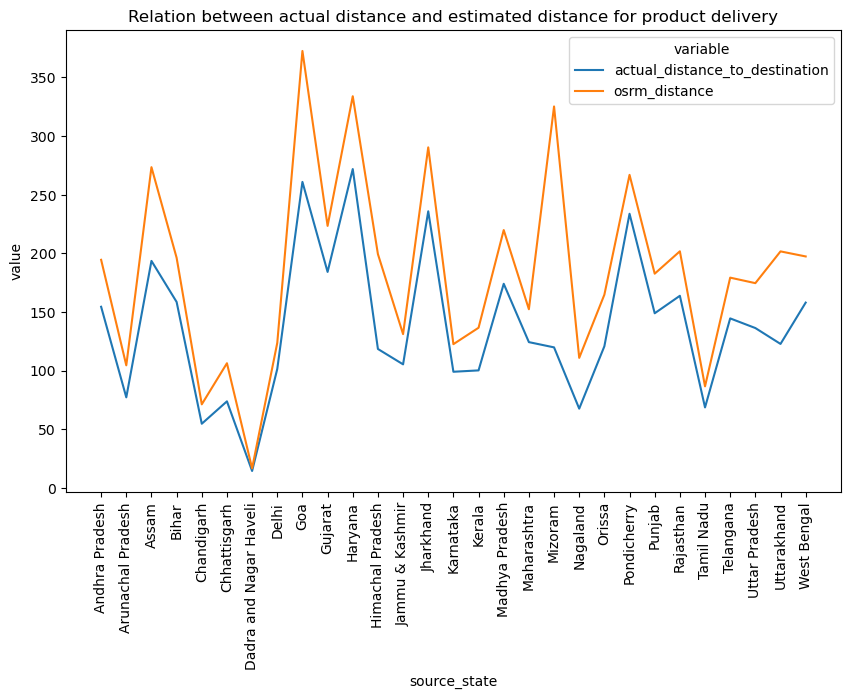

In [331]:
plt.figure(figsize=(10,6))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.title('Relation between actual distance and estimated distance for product delivery')
plt.xticks(rotation=90)
plt.show()

- Value for Actual distance is always higher than that of the estimated distance for product delivery
- Actual and estimated distance for product delivery differ the least in places like Dadra & Nagar Haveli and Tamil Nadu
- Actual and estimated distance for product delivery differ the most in places like Mizoram and Goa

### Relation between actual time and estimated time for product deliver from source to destination

In [402]:
x1=merged_df1.groupby('source_state').aggregate({'start_scan_to_end_scan':'mean','total_min_diff':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['start_scan_to_end_scan', 'total_min_diff'])
x1

,source_state,variable,value
0,Andhra Pradesh,start_scan_to_end_scan,609.694253
1,Arunachal Pradesh,start_scan_to_end_scan,508.500000
2,Assam,start_scan_to_end_scan,742.720149
3,Bihar,start_scan_to_end_scan,701.903134
4,Chandigarh,start_scan_to_end_scan,298.290323
5,Chhattisgarh,start_scan_to_end_scan,240.395349
6,Dadra and Nagar Haveli,start_scan_to_end_scan,71.200000
7,Delhi,start_scan_to_end_scan,363.497253
8,Goa,start_scan_to_end_scan,850.507692
9,Gujarat,start_scan_to_end_scan,485.690667


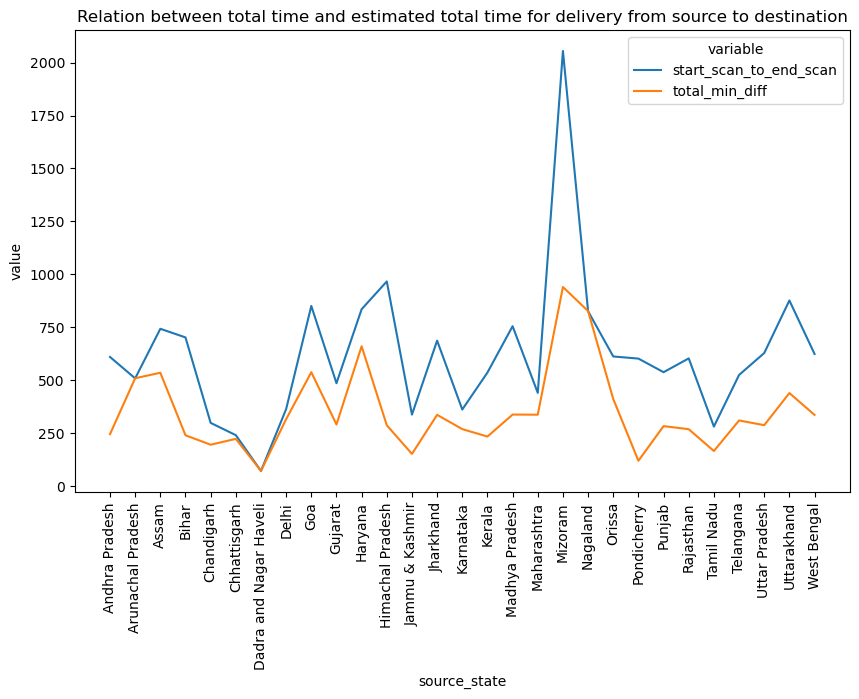

In [403]:
plt.figure(figsize=(10,6))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.title('Relation between total time and estimated total time for delivery from source to destination')
plt.xticks(rotation=90)
plt.show()

- Value for time taken to deliver from source to destination is higher than that of the total trip time most of the cases
- The values for both time taken for delivery and total trip time coincides for states like Arunachal Pradesh, Orissa and Dadra & Nagar Haveli
- Time taken for delivery and total trip time differ the most in Mizoram, Himachal Pradesh, Uttarakhand etc.

### Destination states and destination cities with the highest product delivery

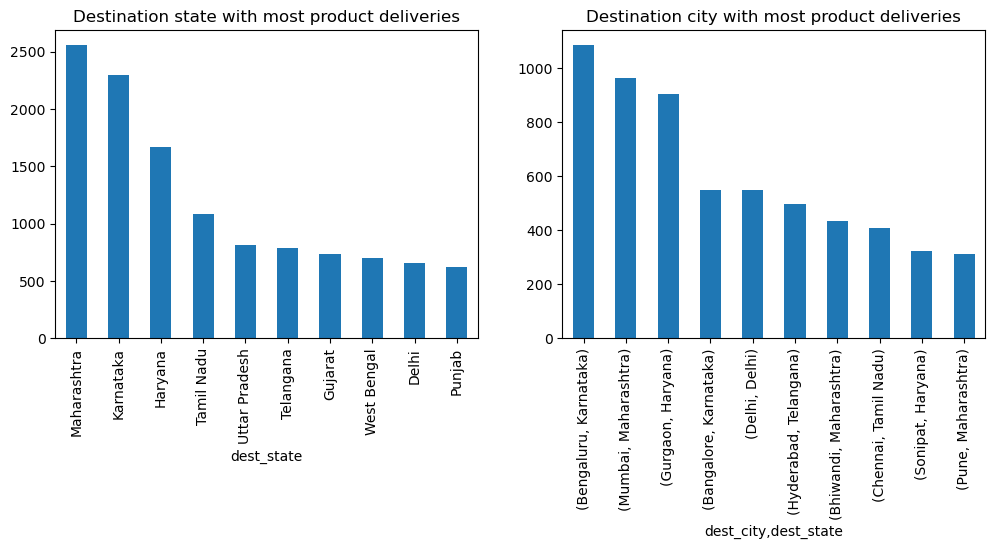

In [266]:
plt.figure(figsize=(12,4))
plt.subplot(121)
merged_df1.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')
#sns.barplot(data=d_state, x='dest_state', y='trip_uuid', palette='Blues_r')
plt.title('Destination state with most product deliveries')
plt.xticks(rotation=90)

plt.subplot(122)
merged_df1.groupby(['dest_city','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Destination city with most product deliveries')
plt.show()

Top 5 Indian states with most product delivery destinations are :

- Maharashtra
- Karnataka 
- Haryana
- Tamil Nadu and
- Telangana

<br>The cities with most destination centres are :

- Gurgaon
- Bangalore
- Bhiwandi
- Mumbai and
- Delhi

### Source states and source cities providing highest product delivery

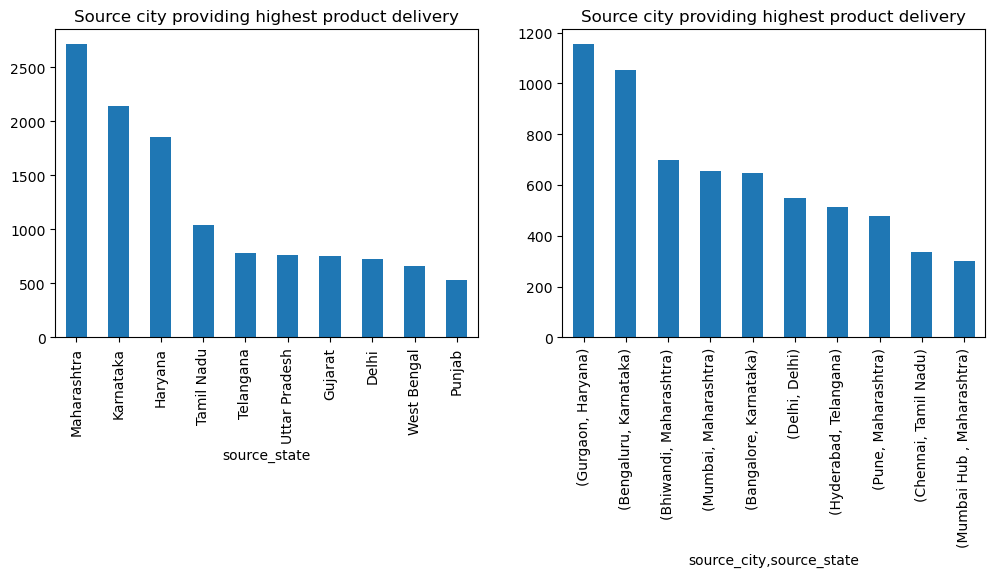

In [268]:
plt.figure(figsize=(12,4))
plt.subplot(121)
merged_df1.groupby('source_state')['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Source city providing highest product delivery')
plt.xticks(rotation=90)

plt.subplot(122)
merged_df1.groupby(['source_city','source_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Source city providing highest product delivery')
plt.show()

Top 5 Indian states with most product delivery sources are :

- Maharashtra
- Karnataka
- Haryana
- Tamil Nadu and
- Telangana

The cities with most source centres are :
- Gurgaon
- Bangalore
- Bhiwandi
- Mumbai and 
- Delhi

### Variation of product delivery across the given months

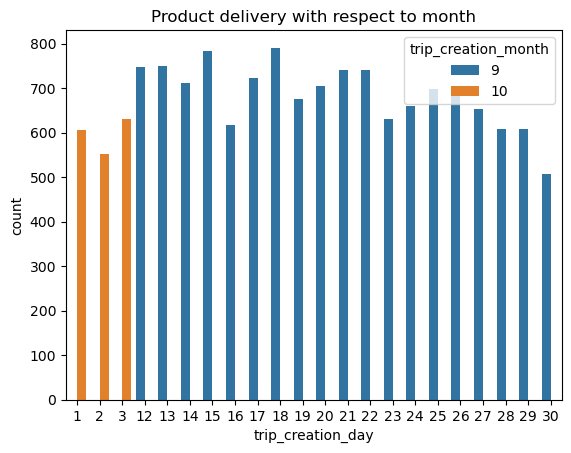

In [208]:
sns.countplot(data=merged_df1,x='trip_creation_day',hue='trip_creation_month')
plt.title('Product delivery with respect to month')
plt.show()

- From the given data for two months, eventhough the variation is small, we can observe that the amount of delivery tends to rise towards the middle of the month

# Feature Engineering

## Missing Values & Data Cleaning

In [53]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [54]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165


- There are 0.2% of null values in the source_name column
- There are 0.18% of null values in the destination_name column

### Replacing null values using Imputation

In [55]:
# Highest Freq imputation for some categorical columns.
cat_missing = ['source_name', 'destination_name']

freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [56]:
missing_to_df(df)

,Total,Percent
data,0,0.0
trip_creation_time,0,0.0
segment_osrm_distance,0,0.0
segment_osrm_time,0,0.0
segment_actual_time,0,0.0
factor,0,0.0
osrm_distance,0,0.0
osrm_time,0,0.0
actual_time,0,0.0
actual_distance_to_destination,0,0.0


- All null values in the dataframe are replaced by mode imputation

## In-depth analysis and feature engineering

In [275]:
data=df.copy()

## 3.1. Calculate the time taken between od_start_time and od_end_time and keep it as a feature

In [276]:
data['total_min_diff'] = (data.od_end_time - data.od_start_time) / pd.Timedelta(minutes=1)
data.drop(columns=['od_end_time','od_start_time'],axis=1, inplace=True)
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,total_min_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,427.686364
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,427.686364
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,427.686364
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630,427.686364


## 3.2. Hypothesis testing between total time difference and start_scan_to_end_scan

In [342]:
x=data.groupby(['trip_uuid','source_center']).agg({'total_min_diff':'max','start_scan_to_end_scan':'max'})
x

total_min_diff  start_scan_to_end_scan
trip_uuid               source_center                                        
trip-153671041653548748 IND209304AAA      1260.604421                  1260.0
                        IND462022AAA       999.505379                   999.0
trip-153671042288605164 IND561203AAB        58.832388                    58.0
                        IND572101AAA       122.779486                   122.0
trip-153671043369099517 IND000000ACB       834.638929                   834.0
...                                               ...                     ...
trip-153861115439069069 IND628204AAA        62.115193                    62.0
                        IND628613AAA        91.087797                    91.0
                        IND628801AAA        44.174403                    44.0
trip-153861118270144424 IND583119AAA       287.474007                   287.0
                        IND583201AAA        66.933565                    66.0

[26309 rows x 2 columns]

In [343]:
x=data.groupby(['trip_uuid','source_center']).agg({'total_min_diff':'max','start_scan_to_end_scan':'max'})
x = x.groupby('trip_uuid').agg({'total_min_diff':'sum','start_scan_to_end_scan':'sum'}).reset_index()
x.rename(columns={'total_min_diff':'total_time_aggregated','start_scan_to_end_scan':'start_scan_to_end_scan_aggregated'},inplace=True)
x

,trip_uuid,total_time_aggregated,start_scan_to_end_scan_aggregated
0,trip-153671041653548748,2260.109800,2259.0
1,trip-153671042288605164,181.611874,180.0
2,trip-153671043369099517,3934.362520,3933.0
3,trip-153671046011330457,100.494935,100.0
4,trip-153671052974046625,718.349042,717.0
...,...,...,...
14812,trip-153861095625827784,258.028928,257.0
14813,trip-153861104386292051,60.590521,60.0
14814,trip-153861106442901555,422.119867,421.0
14815,trip-153861115439069069,348.512862,347.0


**Hypothesis**
- **H0 : Mean of** ***start_scan_to_end_scan_aggregated*** **and** ***total_time_aggregated*** **are** ***same***
- **H1 : Mean of**  ***start_scan_to_end_scan_aggregated***  **and**  ***total_time_aggregated***  **are** ***not the same***

<AxesSubplot:xlabel='total_time_aggregated', ylabel='Density'>

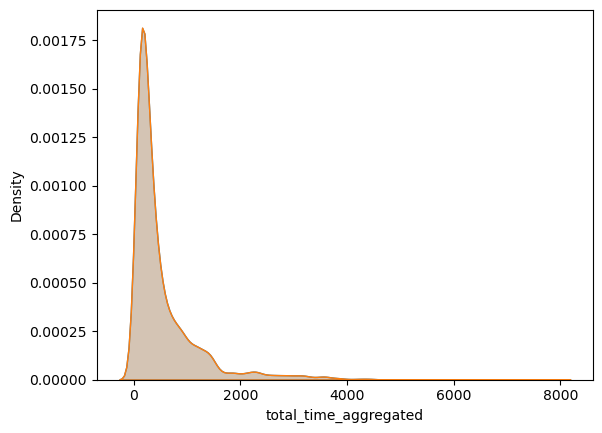

In [345]:
sns.kdeplot(x['total_time_aggregated'],fill=True)
sns.kdeplot(x['start_scan_to_end_scan_aggregated'],fill=True)    

In [349]:
observed_mean_diff = np.mean(x['total_time_aggregated']) - np.mean(x['start_scan_to_end_scan_aggregated'])
observed_mean_diff

0.8858218717051614

In [352]:
p = np.concatenate((x['total_time_aggregated'], x['start_scan_to_end_scan_aggregated']))
p

array([2260.10980005,  181.61187375, 3934.36252007, ...,  421.        ,
        347.        ,  353.        ])

lower critical value -14.715645762810972
upper critical value 15.009023553185802
observed_mean_diff 0.8858218717051614


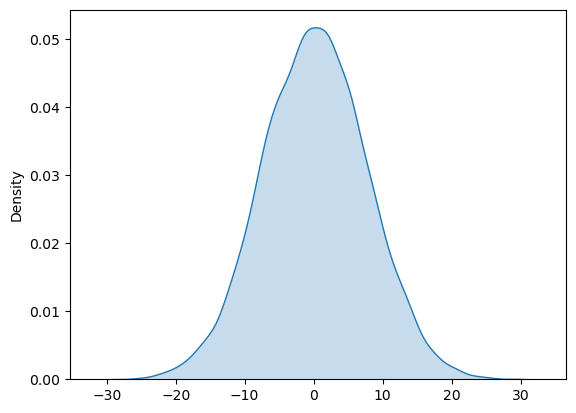

In [354]:
test_sample = []
itr = 10000
for i in range(itr):
    np.random.shuffle(p)
    new_c1 = p[:14817]
    new_c2 = p[14817:]
    mean_diff = np.mean(new_c1) - np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)    
np.mean(test_sample)   
np.std(test_sample)
ucv = (norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv = (norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('lower critical value', lcv)
print('upper critical value', ucv)
print('observed_mean_diff', observed_mean_diff)

**Lower critical value** : ***-14.72***
<br>**Upper critical value** : ***15.01***
<br>**Observed mean difference** : ***0.89***

#### Observed mean difference 0.89 is within the range of acceptance region, [ LCV, UCV ] = [ -14.72, 15.01 ]. So, Null hypothesis is accepted

#### This concludes that the aggregated values for 'total trip time' and 'total time taken for product delivery' are approximately close together

## 3.3 Hypothesis testing between actual_time aggregated value and osrm time aggregated value

In [296]:
x=data.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','osrm_time':'max'})
x

actual_time  osrm_time
trip_uuid               source_center                        
trip-153671041653548748 IND209304AAA         732.0      349.0
                        IND462022AAA         830.0      394.0
trip-153671042288605164 IND561203AAB          47.0       26.0
                        IND572101AAA          96.0       42.0
trip-153671043369099517 IND000000ACB         611.0      212.0
...                                            ...        ...
trip-153861115439069069 IND628204AAA          51.0       41.0
                        IND628613AAA          90.0       48.0
                        IND628801AAA          30.0       14.0
trip-153861118270144424 IND583119AAA         233.0       42.0
                        IND583201AAA          42.0       26.0

[26309 rows x 2 columns]

In [297]:
x=data.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','osrm_time':'max'})
x = x.groupby('trip_uuid').agg({'actual_time':'sum','osrm_time':'sum'}).reset_index()
x.rename(columns={'actual_time':'actual_time_aggregated','osrm_time':'osrm_time_aggregated'},inplace=True)
x

,trip_uuid,actual_time_aggregated,osrm_time_aggregated
0,trip-153671041653548748,1562.0,743.0
1,trip-153671042288605164,143.0,68.0
2,trip-153671043369099517,3347.0,1741.0
3,trip-153671046011330457,59.0,15.0
4,trip-153671052974046625,341.0,117.0
...,...,...,...
14812,trip-153861095625827784,83.0,62.0
14813,trip-153861104386292051,21.0,12.0
14814,trip-153861106442901555,282.0,54.0
14815,trip-153861115439069069,264.0,184.0


**Hypothesis**
- **H0 : Mean of** ***actual_time_aggregated*** **and** ***osrm_time_aggregated*** **are** ***same***
- **H1 : Mean of**  ***actual_time_aggregated***  **and**  ***osrm_time_aggregated***  **are** ***not the same***

<AxesSubplot:xlabel='actual_time_aggregated', ylabel='Density'>

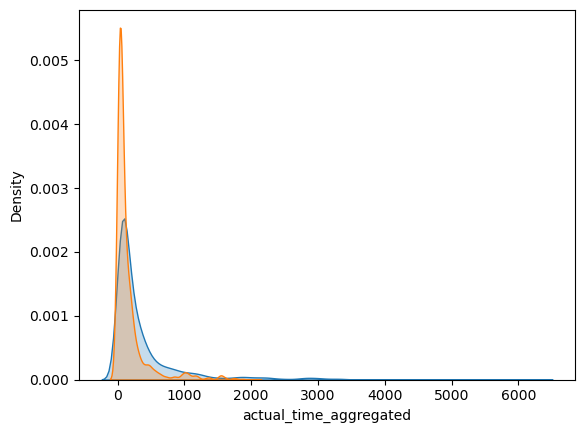

In [298]:
sns.kdeplot(x['actual_time_aggregated'],fill=True)
sns.kdeplot(x['osrm_time_aggregated'],fill=True)

In [299]:
observed_mean_diff = np.mean(x['actual_time_aggregated']) - np.mean(x['osrm_time_aggregated'])
observed_mean_diff

194.9047040561517

In [300]:
p = np.concatenate((x['actual_time_aggregated'], x['osrm_time_aggregated']))
p

array([1562.,  143., 3347., ...,   54.,  184.,   68.])

lower critical value -10.255919461852878
upper critical value 10.221212517127224
observed_mean_diff 194.9047040561517


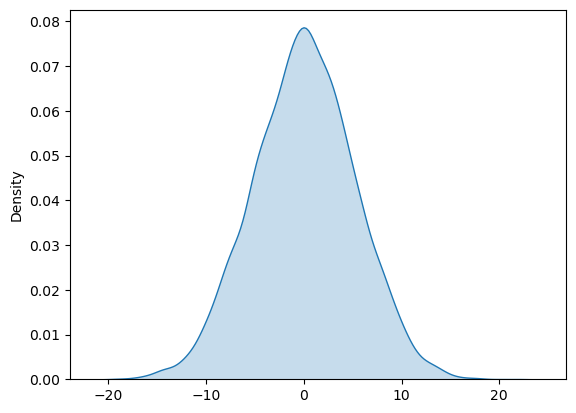

In [301]:
test_sample = []
itr = 10000
for i in range(itr):
    np.random.shuffle(p)
    new_c1 = p[:14817]
    new_c2 = p[14817:]
    mean_diff = np.mean(new_c1) - np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample, fill=True)    
np.mean(test_sample)
np.std(test_sample)
ucv = (norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv = (norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('lower critical value', lcv)
print('upper critical value', ucv)
print('observed_mean_diff', observed_mean_diff)

**Lower critical value** : ***-10.26***
<br>**Upper critical value** : ***10.22***
<br>**Observed mean difference** : ***194.90***

#### Observed mean difference 194.90 is not within the range of acceptance region, [ LCV, UCV ] = [ -10.26, 10.22 ]. So, Alternate hypothesis is accepted
#### This concludes that the aggregated values for 'actual time' and 'estimated time' for product delivery are not close together

## 3.4. Hypothesis testing between actual time aggregated value and segment actual time aggregated value

In [302]:
x=data.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','segment_actual_time':'sum'})
x

actual_time  segment_actual_time
trip_uuid               source_center                                  
trip-153671041653548748 IND209304AAA         732.0                728.0
                        IND462022AAA         830.0                820.0
trip-153671042288605164 IND561203AAB          47.0                 46.0
                        IND572101AAA          96.0                 95.0
trip-153671043369099517 IND000000ACB         611.0                608.0
...                                            ...                  ...
trip-153861115439069069 IND628204AAA          51.0                 49.0
                        IND628613AAA          90.0                 89.0
                        IND628801AAA          30.0                 29.0
trip-153861118270144424 IND583119AAA         233.0                233.0
                        IND583201AAA          42.0                 41.0

[26309 rows x 2 columns]

In [303]:
x=data.groupby(['trip_uuid','source_center']).agg({'actual_time':'max','segment_actual_time':'sum'})
x = x.groupby('trip_uuid').agg({'actual_time':'sum','segment_actual_time':'sum'}).reset_index()
x.rename(columns={'actual_time':'actual_time_aggregated','segment_actual_time':'segment_actual_time_aggregated'},inplace=True)
x

,trip_uuid,actual_time_aggregated,segment_actual_time_aggregated
0,trip-153671041653548748,1562.0,1548.0
1,trip-153671042288605164,143.0,141.0
2,trip-153671043369099517,3347.0,3308.0
3,trip-153671046011330457,59.0,59.0
4,trip-153671052974046625,341.0,340.0
...,...,...,...
14812,trip-153861095625827784,83.0,82.0
14813,trip-153861104386292051,21.0,21.0
14814,trip-153861106442901555,282.0,281.0
14815,trip-153861115439069069,264.0,258.0


**Hypothesis**
- **H0 : Mean of** ***actual_time_aggregated*** **and** ***segment_actual_time_aggregated*** **are** ***same***
- **H1 : Mean of**  ***actual_time_aggregated***  **and**  ***segment_actual_time_aggregated***  **are** ***not the same***

<AxesSubplot:xlabel='actual_time_aggregated', ylabel='Density'>

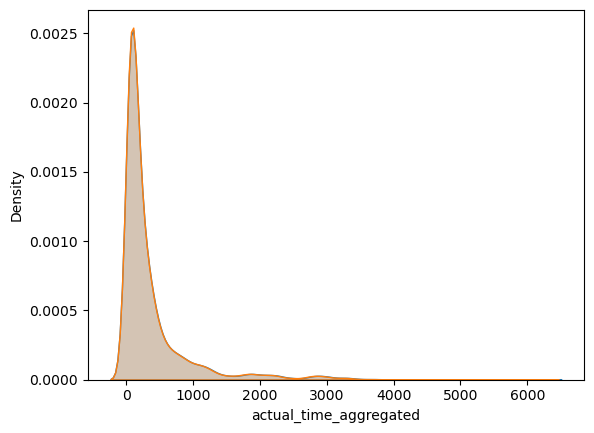

In [304]:
sns.kdeplot(x['actual_time_aggregated'],fill=True)
sns.kdeplot(x['segment_actual_time_aggregated'],fill=True)

In [305]:
observed_mean_diff = np.mean(x['actual_time_aggregated']) - np.mean(x['segment_actual_time_aggregated'])
observed_mean_diff

2.922588918134579

In [306]:
p = np.concatenate((x['actual_time_aggregated'], x['segment_actual_time_aggregated']))
p

array([1562.,  143., 3347., ...,  281.,  258.,  274.])

lower critical value -12.787367824554329
upper critical value 12.942576220315948
observed_mean_diff 2.922588918134579


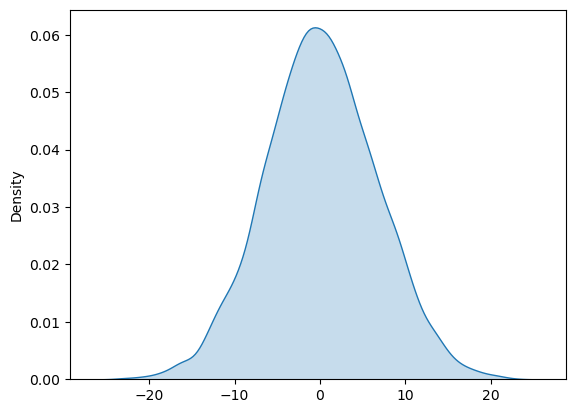

In [307]:
test_sample = []
itr = 10000
for i in range(itr):
    np.random.shuffle(p)
    new_c1 = p[:14817]
    new_c2 = p[14817:]
    mean_diff = np.mean(new_c1) - np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)    
np.mean(test_sample)    
np.std(test_sample)
ucv = (norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv = (norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('lower critical value', lcv)
print('upper critical value', ucv)
print('observed_mean_diff', observed_mean_diff)

**Lower critical value** : ***-12.79***
<br>**Upper critical value** : ***12.94***
<br>**Observed mean difference** : ***2.92***

#### Observed mean difference 2.92 is within the range of acceptance region, [ LCV, UCV ] = [ -12.79, 12.94 ]. So, Null hypothesis is accepted
#### This concludes that the aggregated values for 'actual time' and 'segmented actual time' for product delivery are approximately close together

## 3.5. Hypothesis testing between osrm distance aggregated value and segment osrm distance aggregated value

In [310]:
x=data.groupby(['trip_uuid','source_center']).agg({'osrm_distance':'max','segment_osrm_distance':'sum'})
x

osrm_distance  segment_osrm_distance
trip_uuid               source_center                                      
trip-153671041653548748 IND209304AAA        446.5496               670.6205
                        IND462022AAA        544.8027               649.8528
trip-153671042288605164 IND561203AAB         28.1994                28.1995
                        IND572101AAA         56.9116                55.9899
trip-153671043369099517 IND000000ACB        281.2109               317.7408
...                                              ...                    ...
trip-153861115439069069 IND628204AAA         42.5213                42.1431
                        IND628613AAA         40.6080                78.5869
                        IND628801AAA         16.0185                16.0184
trip-153861118270144424 IND583119AAA         52.5303                52.5303
                        IND583201AAA         28.0484                28.0484

[26309 rows x 2 columns]

In [311]:
x=data.groupby(['trip_uuid','source_center']).agg({'osrm_distance':'max','segment_osrm_distance':'sum'})
x = x.groupby('trip_uuid').agg({'osrm_distance':'sum','segment_osrm_distance':'sum'}).reset_index()
x.rename(columns={'osrm_distance':'osrm_distance_aggregated','segment_osrm_distance':'segment_osrm_distance_aggregated'},inplace=True)
x

,trip_uuid,osrm_distance_aggregated,segment_osrm_distance_aggregated
0,trip-153671041653548748,991.3523,1320.4733
1,trip-153671042288605164,85.1110,84.1894
2,trip-153671043369099517,2372.0852,2545.2678
3,trip-153671046011330457,19.6800,19.8766
4,trip-153671052974046625,146.7918,146.7919
...,...,...,...
14812,trip-153861095625827784,73.4630,64.8551
14813,trip-153861104386292051,16.0882,16.0883
14814,trip-153861106442901555,63.2841,104.8866
14815,trip-153861115439069069,177.6635,223.5324


**Hypothesis**
- **H0 : Mean of** ***osrm_distance_aggregated*** **and** ***segment_osrm_distance_aggregated*** **are** ***same***
- **H1 : Mean of**  ***osrm_distance_aggregated***  **and**  ***segment_osrm_distance_aggregated***  **are** ***not the same***

<AxesSubplot:xlabel='osrm_distance_aggregated', ylabel='Density'>

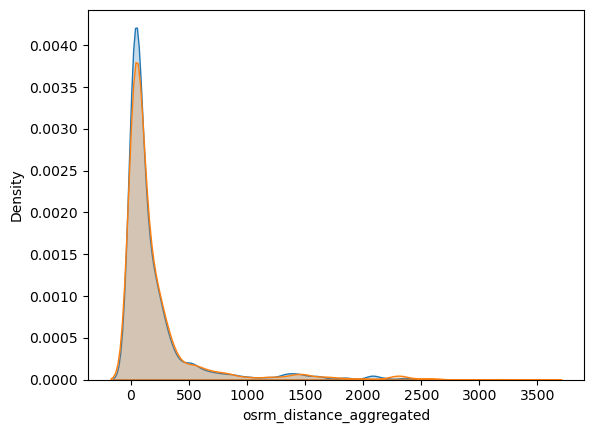

In [312]:
sns.kdeplot(x['osrm_distance_aggregated'],fill=True)
sns.kdeplot(x['segment_osrm_distance_aggregated'],fill=True)

In [313]:
observed_mean_diff = np.mean(x['osrm_distance_aggregated']) - np.mean(x['segment_osrm_distance_aggregated'])
observed_mean_diff

-18.289453742322962

In [314]:
p = np.concatenate((x['osrm_distance_aggregated'], x['segment_osrm_distance_aggregated']))
p

array([ 991.3523,   85.111 , 2372.0852, ...,  104.8866,  223.5324,
         80.5787])

lower critical value -8.99719787279252
upper critical value 9.063900251017529
observed_mean_diff -18.289453742322962


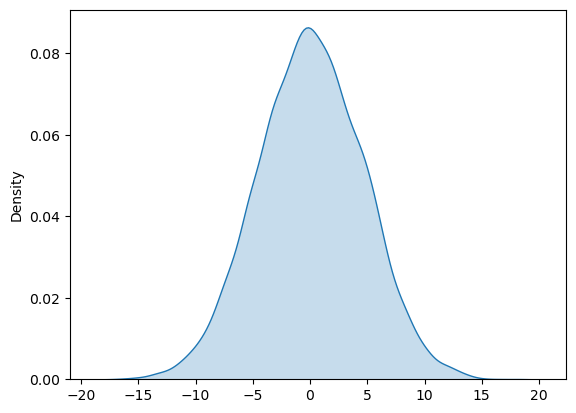

In [315]:
test_sample = []
itr = 10000
for i in range(itr):
    np.random.shuffle(p)
    new_c1 = p[:14817]
    new_c2 = p[14817:]
    mean_diff = np.mean(new_c1) - np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)    
np.mean(test_sample)
np.std(test_sample)
ucv = (norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv = (norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('lower critical value', lcv)
print('upper critical value', ucv)
print('observed_mean_diff', observed_mean_diff)

**Lower critical value** : ***-8.99***
<br>**Upper critical value** : ***9.06***
<br>**Observed mean difference** : ***-18.29***

#### Observed mean difference -18.29 is not within the range of acceptance region, [ LCV, UCV ] = [ -8.99, 9.06 ]. So, Alternate hypothesis is accepted
#### This concludes that the aggregated values for 'estimate distance' and 'segmented estimate distance' for product delivery are not close together

## 3.6. Hypothesis testing between osrm time aggregated value and segment osrm time aggregated value

In [316]:
x=data.groupby(['trip_uuid','source_center']).agg({'osrm_time':'max','segment_osrm_time':'sum'})
x

osrm_time  segment_osrm_time
trip_uuid               source_center                              
trip-153671041653548748 IND209304AAA       349.0              534.0
                        IND462022AAA       394.0              474.0
trip-153671042288605164 IND561203AAB        26.0               26.0
                        IND572101AAA        42.0               39.0
trip-153671043369099517 IND000000ACB       212.0              231.0
...                                          ...                ...
trip-153861115439069069 IND628204AAA        41.0               42.0
                        IND628613AAA        48.0               77.0
                        IND628801AAA        14.0               14.0
trip-153861118270144424 IND583119AAA        42.0               42.0
                        IND583201AAA        26.0               25.0

[26309 rows x 2 columns]

In [317]:
x=data.groupby(['trip_uuid','source_center']).agg({'osrm_time':'max','segment_osrm_time':'sum'})
x = x.groupby('trip_uuid').agg({'osrm_time':'sum','segment_osrm_time':'sum'}).reset_index()
x.rename(columns={'osrm_time':'osmr_time_aggregated','segment_osrm_time':'segment_osrm_time_aggregated'},inplace=True)
x

,trip_uuid,osmr_time_aggregated,segment_osrm_time_aggregated
0,trip-153671041653548748,743.0,1008.0
1,trip-153671042288605164,68.0,65.0
2,trip-153671043369099517,1741.0,1941.0
3,trip-153671046011330457,15.0,16.0
4,trip-153671052974046625,117.0,115.0
...,...,...,...
14812,trip-153861095625827784,62.0,62.0
14813,trip-153861104386292051,12.0,11.0
14814,trip-153861106442901555,54.0,88.0
14815,trip-153861115439069069,184.0,221.0


**Hypothesis**
- **H0 : Mean of** ***osmr_time_aggregated*** **and** ***segment_osrm_time_aggregated*** **are** ***same***
- **H1 : Mean of**  ***osmr_time_aggregated***  **and**  ***segment_osrm_time_aggregated***  **are** ***not the same***

<AxesSubplot:xlabel='osmr_time_aggregated', ylabel='Density'>

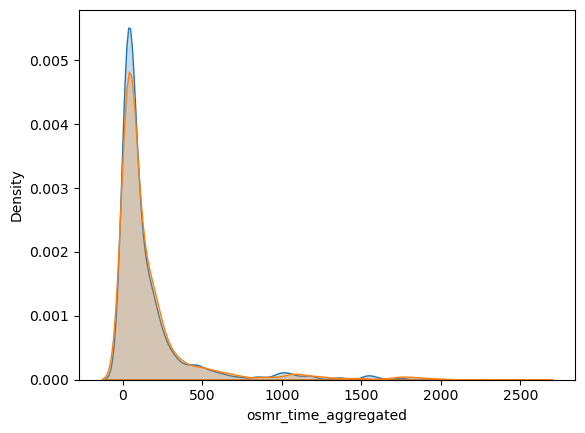

In [318]:
sns.kdeplot(x['osmr_time_aggregated'],fill=True)
sns.kdeplot(x['segment_osrm_time_aggregated'],fill=True)

In [319]:
observed_mean_diff = np.mean(x['osmr_time_aggregated']) - np.mean(x['segment_osrm_time_aggregated'])
observed_mean_diff

-19.03961665654316

In [320]:
p = np.concatenate((x['osmr_time_aggregated'], x['segment_osrm_time_aggregated']))
p

array([ 743.,   68., 1741., ...,   88.,  221.,   67.])

lower critical value -6.680676538127446
upper critical value 6.780323997127241
observed_mean_diff -19.03961665654316


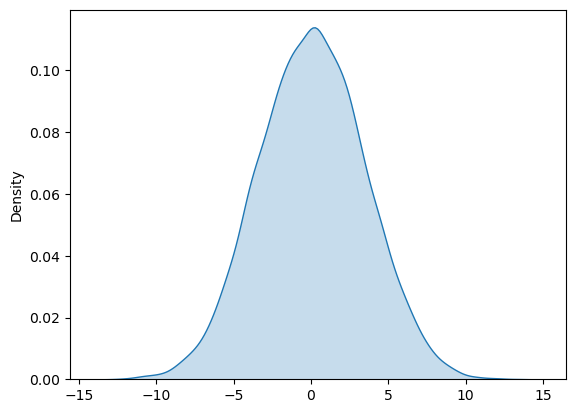

In [321]:
test_sample = []
itr = 10000
for i in range(itr):
    np.random.shuffle(p)
    new_c1 = p[:14817]
    new_c2 = p[14817:]
    mean_diff = np.mean(new_c1) - np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)    
np.mean(test_sample)
np.std(test_sample)
ucv = (norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv = (norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('lower critical value', lcv)
print('upper critical value', ucv)
print('observed_mean_diff', observed_mean_diff)

**Lower critical value** : ***-6.68***
<br>**Upper critical value** : ***6.78***
<br>**Observed mean difference** : ***-19.04***

#### Observed mean difference -19.04 is not within the range of acceptance region, [ LCV, UCV ] = [ -6.68, 6.78 ]. So, Alternate hypothesis is accepted
#### This concludes that the aggregated values for 'estimate time' and 'segmented estimate time' for product delivery are not close together

## 3.7. Find outliers in the numerical variables and and check it using visual analysis

In [112]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20.000000,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18.000000,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18.000000,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19.000000,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [113]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


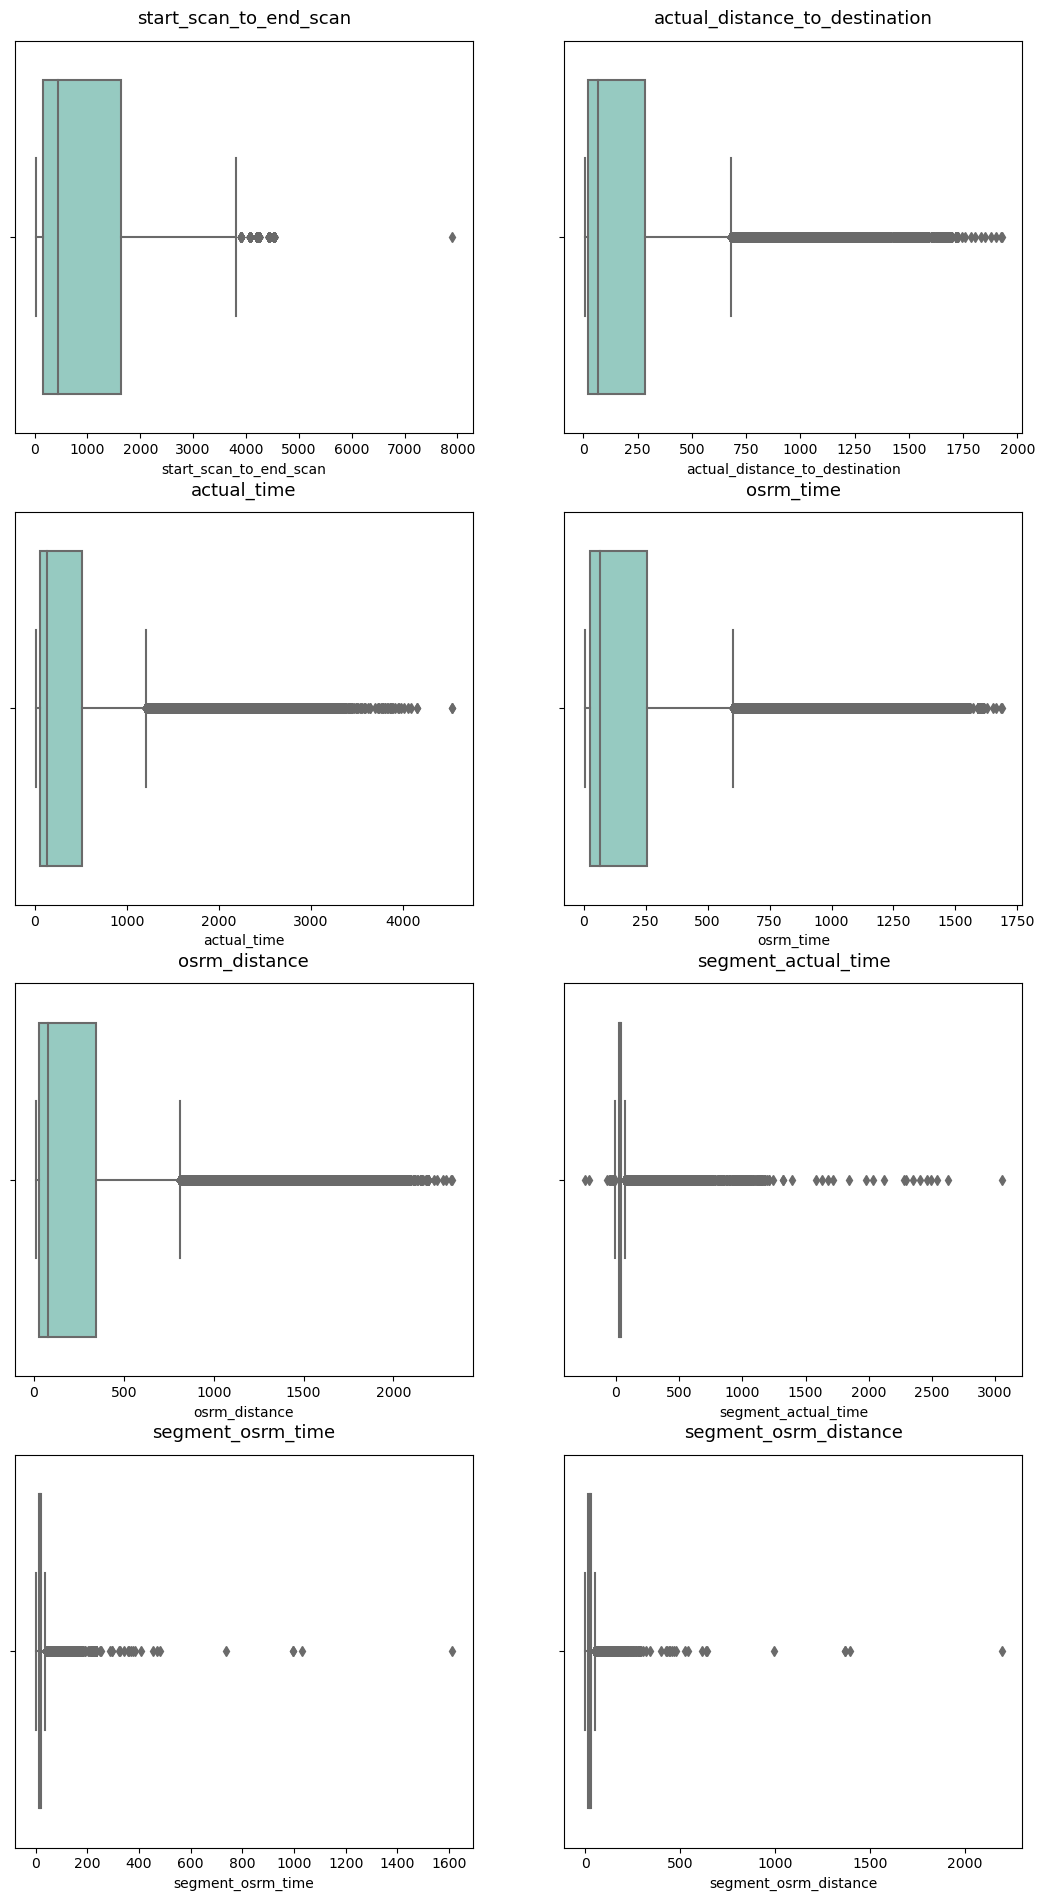

In [370]:
attrs = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(13, 13))
fig.subplots_adjust(top=1.5)
count = 0
for row in range(4):
    for col in range(2):
        sns.boxplot(data=df, x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"{attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

In [363]:
outlier=data.copy()
attrs = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 
         'osrm_distance', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance']
for i in attrs: 
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3 - q1
    lower = q1-(1.5)*iqr
    upper = q3+(1.5)*iqr
    print('Inter Quartile Range for',i,'=',iqr)
    print(f'The lower limit of outliers for {i} = {lower}')
    print('The upper limit of outliers for',i,'=',upper)
    print('----------------------------------------------------')
    outlier=outlier[~((outlier[i]<lower)|(outlier[i]>upper))]
print('\033[1m'+'\n\nData frame after outlier detection')
outlier    

Inter Quartile Range for start_scan_to_end_scan = 1473.0
The lower limit of outliers for start_scan_to_end_scan = -2048.5
The upper limit of outliers for start_scan_to_end_scan = 3843.5
----------------------------------------------------
Inter Quartile Range for actual_distance_to_destination = 263.3530002362333
The lower limit of outliers for actual_distance_to_destination = -371.6736259929169
The upper limit of outliers for actual_distance_to_destination = 681.7383749520162
----------------------------------------------------
Inter Quartile Range for actual_time = 462.0
The lower limit of outliers for actual_time = -642.0
The upper limit of outliers for actual_time = 1206.0
----------------------------------------------------
Inter Quartile Range for osrm_time = 230.0
The lower limit of outliers for osrm_time = -318.0
The upper limit of outliers for osrm_time = 602.0
----------------------------------------------------
Inter Quartile Range for osrm_distance = 313.27855000000005
The 

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,total_min_diff
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144861,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,37.406091,81.0,62.0,60.1136,1.306452,11.0,12.0,9.5478,0.916667,427.686364
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,427.686364
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,427.686364
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,...,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,427.686364


- Number of rows have reduced from 1,44,867 to 1,14,085 which proves that several rows containing outliers across different columns of the dataframe are removed successfully

## Categorical to Numerical encoding

### Do one-hot encoding of categorical variables (route_type)

### One Hot Encoding

In [364]:
one_hot_encoded_data = pd.get_dummies(outlier,columns=['route_type'])
one_hot_encoded_data

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,is_cutoff,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,total_min_diff,route_type_Carting,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,86.213637,1,0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,86.213637,1,0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,86.213637,1,0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,True,...,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,86.213637,1,0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,False,...,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144861,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,True,...,62.0,60.1136,1.306452,11.0,12.0,9.5478,0.916667,427.686364,1,0
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,True,...,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000,427.686364,1,0
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,True,...,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095,427.686364,1,0
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),427.0,True,...,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235,427.686364,1,0


- The route type column containing values 'carting' and 'FTL' are successfully one hot encoded from categorical values to binary numerical values 0 and 1

**Dropping unwanted columns before performing Target encoding**

In [117]:
df_new=one_hot_encoded_data.drop(['data','trip_creation_time','source_name','destination_name','is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],axis=1)
df_new

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_min_diff,route_type_Carting,route_type_FTL
0,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,1,0
1,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,1,0
2,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,1,0
3,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,1,0
4,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144861,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,37.406091,81.0,62.0,60.1136,11.0,12.0,9.5478,427.686364,1,0
144862,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364,1,0
144863,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364,1,0
144864,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364,1,0


### Encoding nominal categorical values to numerical values using target encoding

In [118]:
from category_encoders import TargetEncoder
te = TargetEncoder()

cols=['route_schedule_uuid','trip_uuid','source_center','destination_center']
for col in cols:
    df_new[col] = te.fit_transform(df_new[col], df_new['segment_actual_time'])
df_new

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_min_diff,route_type_Carting,route_type_FTL
0,15.016514,24.705609,14.602140,14.602140,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,1,0
1,15.016514,24.705609,14.602140,14.602140,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,1,0
2,15.016514,24.705609,14.602140,14.602140,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,1,0
3,15.016514,24.705609,14.602140,14.602140,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,1,0
4,15.016514,24.705609,14.602140,14.602140,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144861,20.109914,25.735087,26.855453,28.812624,427.0,37.406091,81.0,62.0,60.1136,11.0,12.0,9.5478,427.686364,1,0
144862,20.109914,25.735087,26.855453,28.812624,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364,1,0
144863,20.109914,25.735087,26.855453,28.812624,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364,1,0
144864,20.109914,25.735087,26.855453,28.812624,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364,1,0


- Successfully performed conversion of categorical values to corresponding numerical values with numbers derived from the target

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [407]:
std_data = scaler.fit_transform(df_new)
std_data = pd.DataFrame(std_data, columns=df_new.columns)
std_data

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_min_diff,route_type_Carting,route_type_FTL
0,-1.652946,-1.049382,-2.082120,-1.999254,-0.733058,-0.706326,-0.764488,-0.734013,-0.715206,-0.933022,-0.591887,-0.761857,-0.733403,1.282607,-1.282607
1,-1.652946,-1.049382,-2.082120,-1.999254,-0.733058,-0.649305,-0.724543,-0.665329,-0.660398,-1.206422,-0.845635,-0.987183,-0.733403,1.282607,-1.282607
2,-1.652946,-1.049382,-2.082120,-1.999254,-0.733058,-0.590947,-0.660632,-0.604278,-0.599659,-0.796323,-1.099383,-0.879315,-0.733403,1.282607,-1.282607
3,-1.652946,-1.049382,-2.082120,-1.999254,-0.733058,-0.534063,-0.572755,-0.512700,-0.526523,-0.454574,-0.465013,-0.653897,-0.733403,1.282607,-1.282607
4,-1.652946,-1.049382,-2.082120,-1.999254,-0.733058,-0.512143,-0.548788,-0.482174,-0.477909,-1.479821,-1.353131,-1.583992,-0.733403,1.282607,-1.282607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114080,-0.995287,-0.750225,-0.121535,0.182547,-0.315850,-0.525424,-0.496860,-0.344808,-0.444800,-1.138072,-0.465013,-1.008753,-0.315618,1.282607,-1.282607
114081,-0.995287,-0.750225,-0.121535,0.182547,-0.315850,-0.472756,-0.444932,-0.360071,-0.400913,-1.069722,-0.465013,-1.147852,-0.315618,1.282607,-1.282607
114082,-0.995287,-0.750225,-0.121535,0.182547,-0.315850,-0.413500,-0.341077,-0.237968,-0.301199,-0.112825,0.676852,-0.209627,-0.315618,1.282607,-1.282607
114083,-0.995287,-0.750225,-0.121535,0.182547,-0.315850,-0.332535,-0.261188,-0.146390,-0.237117,-0.522924,2.326213,0.130747,-0.315618,1.282607,-1.282607


## Recommendations and Insights

- It can be observed that there is heavy traffic in Mahrashtra followed by Karnataka and Haryana. This is a good indicator that we need to plan for resources on ground in these 3 states on priority. Especially, during festive seasons
- There is a significant difference between OSRM (open source routing machine) and actual parameters. Revisit information fed to routing machine for trip planning.
- Most number of products were delivered through carting rather than full truck load and the total time taken for carting is significantly lower than that of FTL. This indicates that for faster delivery of the products, carting method is more preferable
- From the data, we can observe both source and destination centres getting passively distributed more towards one of the cities from each direction / zones. However it would be difficult to conclude this, by looking at just 2 months data.
- Most of the products were delivered during wednesday followed by saturday and thursday. Least number of products were delivered on sunday. This might indicate that it is preferable for customers to get products delivered during weekdays other than sundays or mondays
- The observed value for actual time is always higher than that of the estimated time for product delivery. However in certain states like Dadra & Nagar Haveli and Tamil Nadu, the difference between actual and estimated time is low. Also, for product delivery in places like Mizoram and Himachal Pradesh, actual and estimated time difference are very high. If the routing machine is configured to give optimum results, then the difference can explained pertaining to the traffic conditions or the closeness between starting and ending points of the delivery
- Similarly the observed value for actual distance is always higher than that of the estimated distance for product delivery. The degree of closeness/difference between the values can be explained by the possibility of detours during product delivery or due to the inaccuracy in the estimation of shortest path
- The values for time taken to deliver from source to destination is higher than that of the total trip time most of the cases however the values coincides for states like Arunachal Pradesh, Orissa and Dadra & Nagar Haveli. Time taken for delivery and total trip time differ the most in Mizoram, Himachal Pradesh and Uttarakhand
- The above three observations indicates that product delivery in Mizoram is most difficult, whereas it is much easier in the union terittory Dadra & Nagar Haveli
- Hypothesis test performed on different features indicated that observed values for estimated time and estimated distance vary significantly compared to actual time and actual distance. This indicate the chance for discrepancies with transporters or error during the formation of optimum estimate values